# **Individual Assignment**

In order to facilitate data capture and processing, the necessary Python libraries are first imported, including `matplotlib.pyplot` for data visualization, `numpy` for numerical calculations, `pandas` for data analysis, and `scipy.optimize.minimize` for optimization and `yfinance` for obtaining stock data. Finally, the risk-free rate **RFR** (based on the US 10-year Treasury yield) and the number of trading days in a year **TRADING_DAYS** (usually 252 days) are defined. These parameters will be used for subsequent portfolio performance evaluation.

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import yfinance as yf

plt.style.use("ggplot")

RFR = 0.0438  # Risk-free rate is defined by US 10-year government treasury yields from Bloomberg
TRADING_DAYS = 252

## **Data Retrieval**

First, define a list `tickers` containing 10 stock codes, indicating the target stocks to be analyzed. Then, initialize an empty list `groups` to store the historical data of each stock.

Next, use the `download` function of the `yfinance` library through the `for` loop to obtain the market data of **10 stocks from January 1, 2020 to December 31, 2024**. The dataset returns **a single pandas data set** containing the historical prices of the stock (open, high, low, close, volume). Subsequently, organize the variable names, insert "Ticker", and set it to the stock code of the current data being downloaded, so that the stock corresponding to each row of data can be clearly identified.

Finally, use the `pd.concat` function to merge all the data frames in the `groups` list into a single data frame `df` by column, thereby creating a centralized data frame containing the historical data of all specified stocks for subsequent analysis.

In [32]:
tickers = ["AAPL","MSFT","GOOG","AMZN","META","TSLA","JPM","BAC","JNJ","WMT"]
groups = []

for ticker in tickers:
    data = yf.download(ticker,start = "2020-01-01",end="2024-12-31")
    data.columns = data.columns.droplevel(1)
    data.insert(0, "Ticker", ticker)
    groups.append(data)
groups

df = pd.concat(groups)
df

/tmp/ipykernel_1635/205889850.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker,start = "2020-01-01",end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1635/205889850.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker,start = "2020-01-01",end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1635/205889850.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker,start = "2020-01-01",end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1635/205889850.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker,start = "2020-01-01",end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


/tmp/ipykernel_1635/205889850.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker,start = "2020-01-01",end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1635/205889850.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker,start = "2020-01-01",end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1635/205889850.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker,start = "2020-01-01",end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1635/205889850.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker,start = "2020-01-01",end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Price,Ticker,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,AAPL,72.620842,72.681289,71.373218,71.627092,135480400
2020-01-03,AAPL,71.914810,72.676439,71.689950,71.847110,146322800
2020-01-06,AAPL,72.487831,72.526518,70.783234,71.034694,118387200
2020-01-07,AAPL,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,AAPL,73.307518,73.609752,71.849540,71.849540,132079200
...,...,...,...,...,...,...
2024-12-23,WMT,89.885246,91.029332,88.452659,91.029332,26205400
2024-12-24,WMT,92.203255,92.203255,89.885238,89.905140,8992400
2024-12-26,WMT,92.312698,92.402232,91.695885,92.063984,10994000


In [33]:
print(f"The number of duplicated data is {df.duplicated().sum()}")
print(f"The number of missing data is {df.isnull().sum().sum()}")

The number of duplicated data is 0
The number of missing data is 0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12570 entries, 2020-01-02 to 2024-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  12570 non-null  object 
 1   Close   12570 non-null  float64
 2   High    12570 non-null  float64
 3   Low     12570 non-null  float64
 4   Open    12570 non-null  float64
 5   Volume  12570 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 687.4+ KB


The above results show that there is **no duplicated and missing values and the volume is already in integer type**, thus, there is no need to conduct additional cleaning of the dataset. This dataset is clean and in order, which can be use directly.

In [35]:
df.to_csv("2020_2024_10stocks.csv")

Save the data into a single `CSV` file.

In [36]:
df = pd.read_csv("2020_2024_10stocks.csv")
df["Date"] = pd.to_datetime(df["Date"])
df

,Date,Ticker,Close,High,Low,Open,Volume
0,2020-01-02,AAPL,72.620842,72.681289,71.373218,71.627092,135480400
1,2020-01-03,AAPL,71.914810,72.676439,71.689950,71.847110,146322800
2,2020-01-06,AAPL,72.487831,72.526518,70.783234,71.034694,118387200
3,2020-01-07,AAPL,72.146935,72.753816,71.926907,72.497522,108872000
4,2020-01-08,AAPL,73.307518,73.609752,71.849540,71.849540,132079200
...,...,...,...,...,...,...,...
12565,2024-12-23,WMT,89.885246,91.029332,88.452659,91.029332,26205400
12566,2024-12-24,WMT,92.203255,92.203255,89.885238,89.905140,8992400
12567,2024-12-26,WMT,92.312698,92.402232,91.695885,92.063984,10994000
12568,2024-12-27,WMT,91.188507,91.874953,90.561743,91.656083,11384400


## **Data Exploration**

Convert a long-format data frame containing historical data for multiple stocks into **a wide-format data frame where each row represents a date and each column represents the closing price of a stock**. Use the `head` function to present the head of the wide data frame. 

In [37]:
df_pivot = df.pivot(index="Date", columns="Ticker", values="Close")
df_pivot.head()

Ticker,AAPL,AMZN,BAC,GOOG,JNJ,JPM,META,MSFT,TSLA,WMT
Date,,,,,,,,,,
2020-01-02,72.620842,94.900497,31.092316,67.964508,124.983673,120.733551,208.635391,153.042297,28.684000,36.593380
2020-01-03,71.914810,93.748497,30.446741,67.630997,123.536652,119.140305,207.531464,151.136673,29.534000,36.270321
2020-01-06,72.487831,95.143997,30.403120,69.298576,123.382545,119.045578,211.440048,151.527313,30.102667,36.196484
2020-01-07,72.146935,95.343002,30.202459,69.255341,124.136009,117.021744,211.897522,150.145676,31.270666,35.861134
2020-01-08,73.307518,94.598503,30.507805,69.801094,124.118866,117.934631,214.045731,152.537292,32.809334,35.738071


Use the `tail` function to present the tail of wide data frame.

In [38]:
df_pivot.tail()

Ticker,AAPL,AMZN,BAC,GOOG,JNJ,JPM,META,MSFT,TSLA,WMT
Date,,,,,,,,,,
2024-12-23,254.655716,225.059998,43.359245,195.531952,142.891418,235.713257,598.856018,433.583038,430.600006,89.885246
2024-12-24,257.578674,229.050003,43.843319,197.108246,143.461914,239.589233,606.742920,437.647400,462.279999,92.203255
2024-12-26,258.396667,227.050003,44.011265,196.639343,143.196320,240.409912,602.350220,436.432068,454.130005,92.312698
2024-12-27,254.974930,223.750000,43.803802,193.586487,142.675003,238.462036,598.816040,428.881104,431.660004,91.188507
2024-12-30,251.593094,221.300003,43.379002,192.239655,140.992996,236.632812,590.260254,423.202911,417.410004,90.104118


Plot the closing prices of 10 stocks from 2020 to 2024. These 10 stocks have maintained **an overall upward trend** over the past five years.

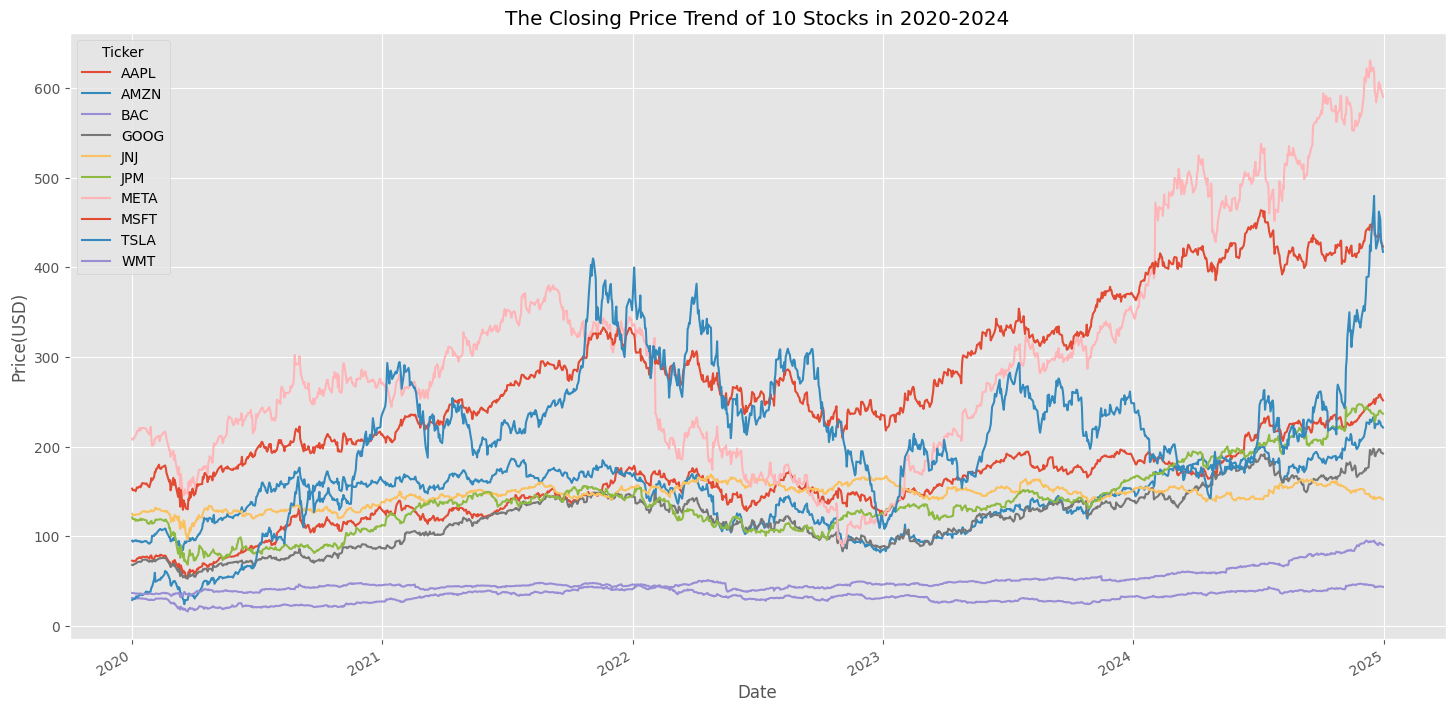

In [39]:
df_pivot.plot()
plt.title("The Closing Price Trend of 10 Stocks in 2020-2024")
plt.ylabel("Price(USD)")
plt.xlabel("Date")
plt.tight_layout()
plt.gcf().set_size_inches(16, 8)

## **Backtesting**

Define a function called `Bollinger_Bands_Strategy` that implements the Bollinger Bands strategy to generate trading signals and calculate the returns of the strategy. 

- Define a function called `Bollinger_Bands_Strategy` that receives two parameters: `stock_data` (stock data) and `WINDOW` (window size for calculating the moving average).

- Create a copy of the input data `stock_data` and stores it in the variable `data` to avoid modifying the original data.

- Calculats the **simple moving average (SMA)** and rolling standard deviation of the closing price with a window size of `WINDOW` and stores it in the `data` data frame.

- Calculate **the Upper Bollinger Band and Lower Bollinger** Band based on the SMA and 2 * standard deviation.

- Generate **trading signals** with initial values ​​of `np.nan` (indicating missing values). 
    - When the closing price is below the lower band, a buy signal (1) is generated; 
    - When the closing price is above the upper band, a sell signal (-1) is generated and the "Signal" column is updated;
    - Forward filling (`ffill`) is used to fill the missing signal values, and `fillna(0)` is used to fill the remaining missing values ​​with 0, indicating that there is no signal.

- **Position** is created based on the signal, that is, buying or selling is decided according to the signal, and the position value is lagged by one period relative to the signal (`shift()`).

- **Daily percentage returns** are calculated and stored in the "Returns" column.

- The **daily return of the strategy** is calculated by multiplying the daily return with the position and stored in the "Strategy" column.

- **Cumulative returns and cumulative returns of the strategy** are calculated.

- `return data` returns the modified data frame `data`, which contains the original data and various indicators and signals calculated according to the Bollinger Bands strategy.

In [40]:
def Bollinger_Bands_Strategy(stock_data, WINDOW):
    data = stock_data.copy()
    data["SMA"] = data["Close"].rolling(WINDOW).mean()
    data["STD"] = data["Close"].rolling(WINDOW).std()
    data["Upper_BB"] = data["SMA"] + 2 * data["STD"]
    data["Lower_BB"] = data["SMA"] - 2 * data["STD"]  
    data["Signal"] = np.nan
    data["Signal"] = np.where(data["Close"] < data["Lower_BB"], 1, data["Signal"])
    data["Signal"] = np.where(data["Close"] > data["Upper_BB"], -1, data["Signal"])
    data["Signal"] = data["Signal"].ffill().fillna(0)
    data["Position"] = data["Signal"].shift()
    data["Returns"] = data["Close"].pct_change()
    data["Strategy"] = data["Returns"] * data["Position"]
    data["CumuReturns"] = (1 + data["Returns"]).cumprod() - 1
    data["CumuStrategy"] = (1 + data["Strategy"]).cumprod() - 1
    return data

Set the window size for calculating the moving average and standard deviation in the Bollinger Bands strategy to 20. 

Apply the pre-defined function `Bollinger_Bands_Strategy` to all 10 stocks.

In [41]:
WINDOW = 20

grouped = df.groupby("Ticker")

Bollinger_results = {}

for name, group in grouped:
    print(f"Now processing signals for {name}....")
    processed_data = Bollinger_Bands_Strategy(group, WINDOW)
    Bollinger_results[name] = processed_data

df = pd.concat(Bollinger_results)
df

Now processing signals for AAPL....
Now processing signals for AMZN....
Now processing signals for BAC....
Now processing signals for GOOG....
Now processing signals for JNJ....
Now processing signals for JPM....
Now processing signals for META....
Now processing signals for MSFT....
Now processing signals for TSLA....
Now processing signals for WMT....


Date Ticker      Close       High        Low       Open  \
AAPL 0     2020-01-02   AAPL  72.620842  72.681289  71.373218  71.627092   
     1     2020-01-03   AAPL  71.914810  72.676439  71.689950  71.847110   
     2     2020-01-06   AAPL  72.487831  72.526518  70.783234  71.034694   
     3     2020-01-07   AAPL  72.146935  72.753816  71.926907  72.497522   
     4     2020-01-08   AAPL  73.307518  73.609752  71.849540  71.849540   
...               ...    ...        ...        ...        ...        ...   
WMT  12565 2024-12-23    WMT  89.885246  91.029332  88.452659  91.029332   
     12566 2024-12-24    WMT  92.203255  92.203255  89.885238  89.905140   
     12567 2024-12-26    WMT  92.312698  92.402232  91.695885  92.063984   
     12568 2024-12-27    WMT  91.188507  91.874953  90.561743  91.656083   
     12569 2024-12-30    WMT  90.104118  90.601546  89.666379  90.263299   

               Volume        SMA       STD   Upper_BB   Lower_BB  Signal  \
AAPL 0      135480400        NaN       NaN        NaN        NaN     0.0   
     1      146322800        NaN       NaN        NaN        NaN     0.0   
     2      118387200        NaN       NaN        NaN        NaN     0.0   
     3      108872000        NaN       NaN        NaN        NaN     0.0   
     4      132079200        NaN       NaN        NaN        NaN     0.0   
...               ...        ...       ...        ...        ...     ...   
WMT  12565   26205400  92.800956  1.699358  96.199672  89.402239    -1.0   
     12566    8992400  92.968979  1.432591  95.834161  90.103798    -1.0   
     12567   10994000  93.052640  1.334919  95.722478  90.382802    -1.0   
     12568   11384400  93.051801  1.336147  95.724094  90.379507    -1.0   
     12569    9790200  92.965969  1.468018  95.902005  90.029933    -1.0   

            Position   Returns  Strategy  CumuReturns  CumuStrategy  
AAPL 0           NaN       NaN       NaN          NaN           NaN  
     1           0.0 -0.009722 -0.000000    -0.009722      0.000000  
     2           0.0  0.007968  0.000000    -0.001832      0.000000  
     3           0.0 -0.004703 -0.000000    -0.006526      0.000000  
     4           0.0  0.016086  0.000000     0.009456      0.000000  
...              ...       ...       ...          ...           ...  
WMT  12565      -1.0 -0.020490  0.020490     1.456325      0.334615  
     12566      -1.0  0.025789 -0.025789     1.519670      0.300197  
     12567      -1.0  0.001187 -0.001187     1.522661      0.298654  
     12568      -1.0 -0.012178  0.012178     1.491940      0.314469  
     12569      -1.0 -0.011892  0.011892     1.462307      0.330101  

[12570 rows x 17 columns]

Generate a chart for each stock **comparing its Bollinger Band strategy returns to buy-and-hold returns** over time.

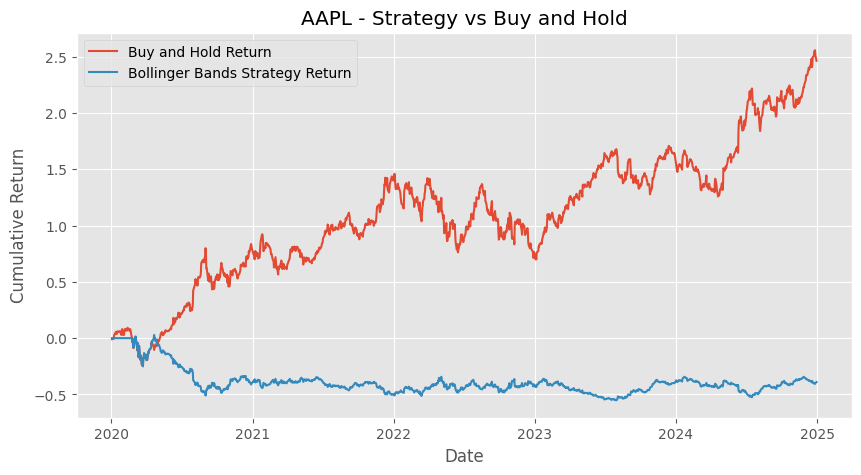

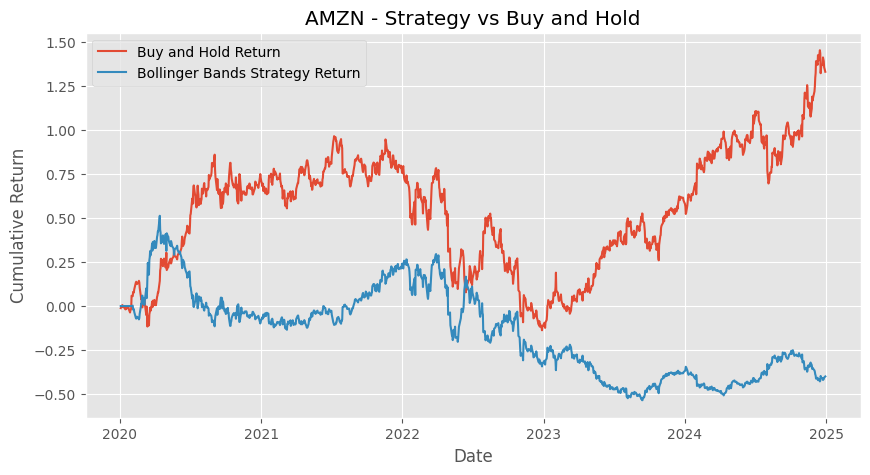

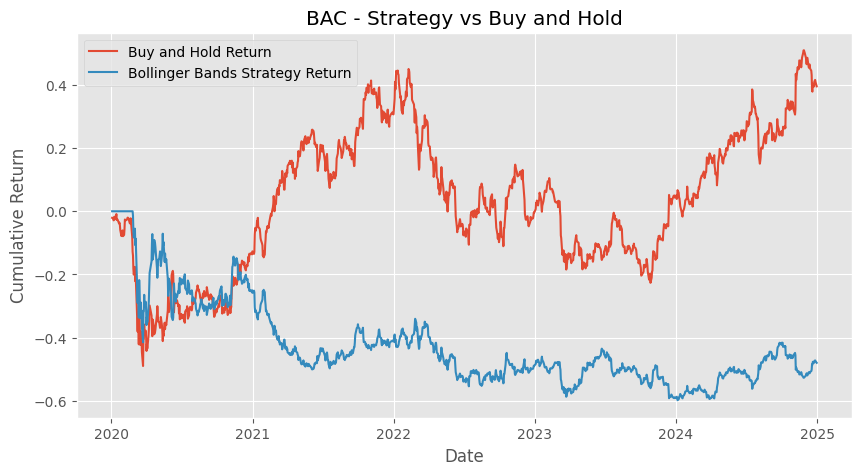

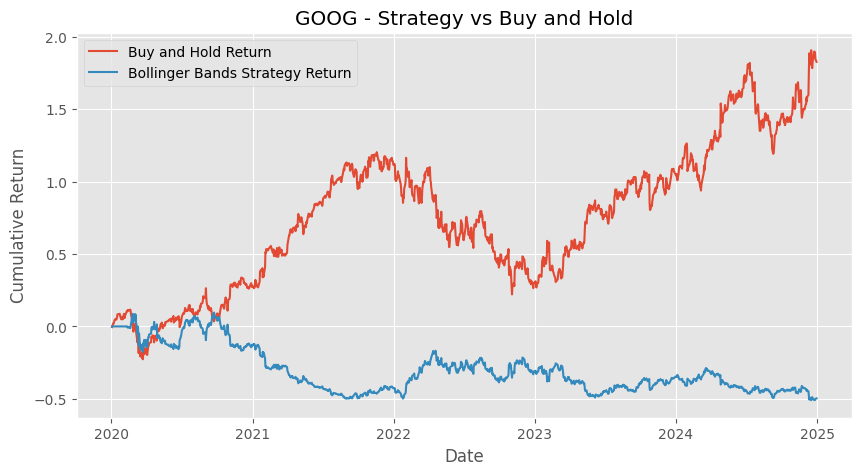

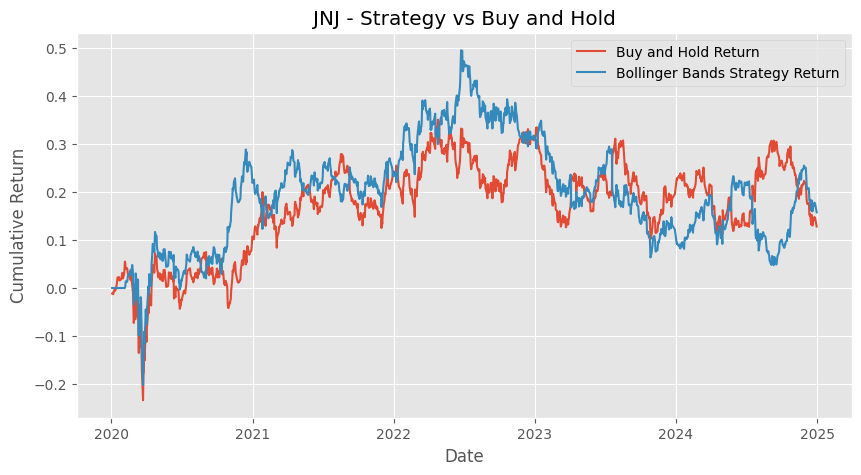

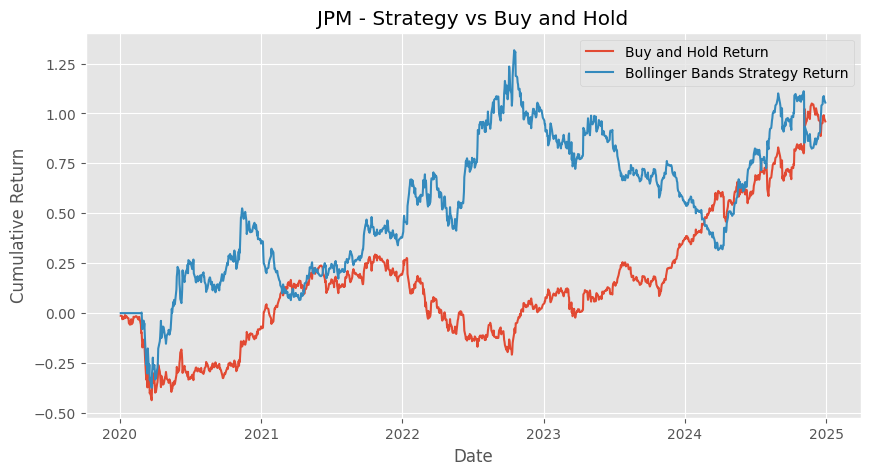

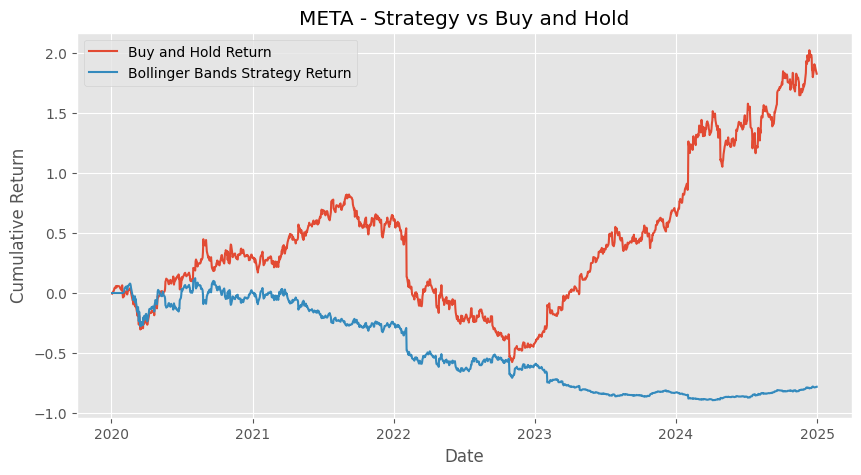

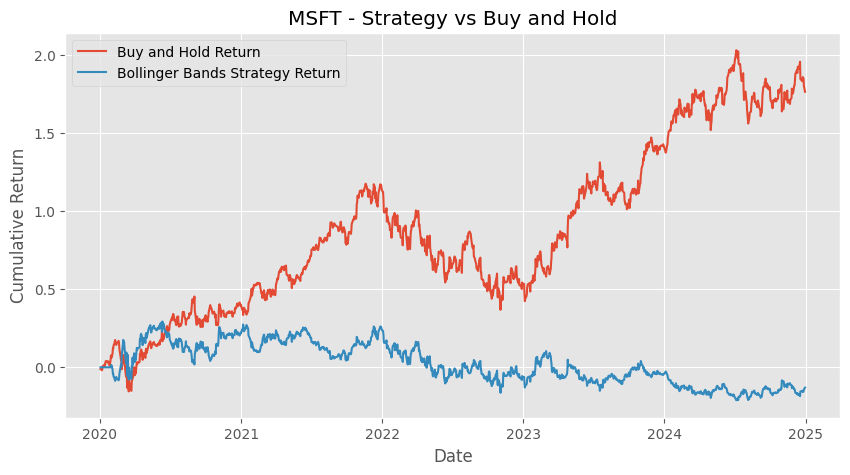

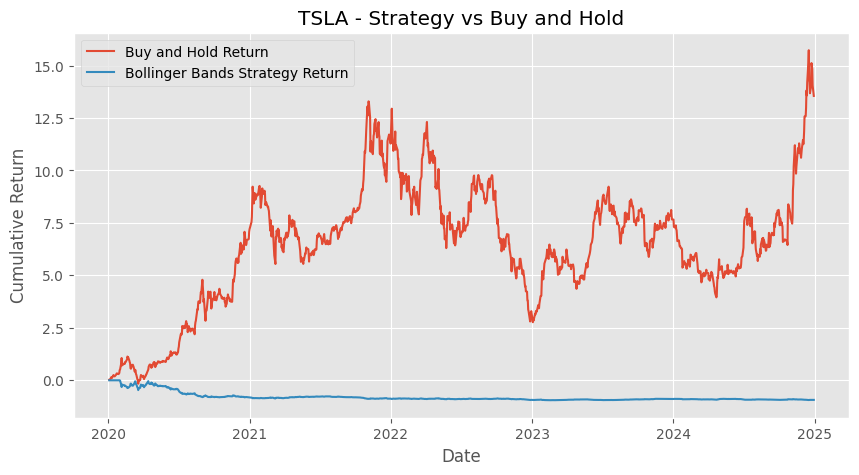

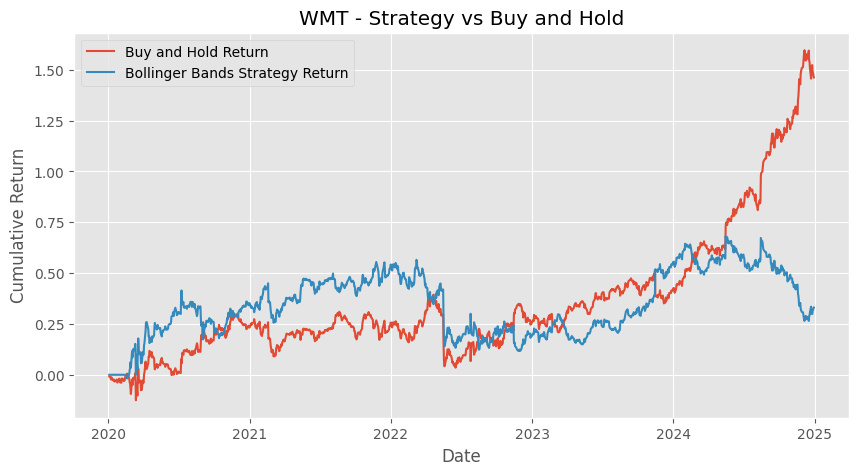

In [42]:
for stock, data in Bollinger_results.items():
    plt.figure(figsize=(10, 5))
    plt.plot(data.Date, data["CumuReturns"], label="Buy and Hold Return")
    plt.plot(data.Date, data["CumuStrategy"], label="Bollinger Bands Strategy Return")
    plt.title(f"{stock} - Strategy vs Buy and Hold")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.legend()
    plt.show()

If the Bollinger Bands strategy return line (blue one) is above the buy and hold return line (red one), then it means the bollinger bands strategy works and by applying this strategy, it can generate more returns. 

However, the above charts shows that in most stock cases, the red one is above the blue one, which means the strategy is not good to apply. In the rest of the cases, the red line and the blue line are intertwined, and the final profit results are not much different. Considering the profit and the complexity of buying and selling, this strategy is not recommended.

All in all, **the Bollinger Bands strategy cannot provide so much extra returns than the normal buy and hold.**

In [43]:
summary = []

for ticker in tickers:
    data = Bollinger_results[ticker]
    final_strategy = data["CumuStrategy"].iloc[-1]
    final_buyhold = data["CumuReturns"].iloc[-1]
    summary.append({
        "Ticker": ticker,
        "Strategy Cumulative Return": final_strategy,
        "Buy & Hold Cumulative Return": final_buyhold
    })

summary_df = pd.DataFrame(summary)
summary_df.set_index("Ticker", inplace=True)
summary_df

,Strategy Cumulative Return,Buy & Hold Cumulative Return
Ticker,,
AAPL,-0.390418,2.464475
MSFT,-0.130241,1.765268
GOOG,-0.497353,1.828530
AMZN,-0.400322,1.331916
META,-0.782267,1.829147
TSLA,-0.933113,13.552015
JPM,1.054309,0.959959
BAC,-0.479288,0.395168
JNJ,0.157563,0.128091


This display of the numerical results also show that all the other stocks have a better returns with buy and hold rather than bollinger bands strategy, except JPM and JNJ (the bollinger bands strategy is slightly better than buy and hold).

**This result is consistent with the above analysis and further supports the conclusion - buy and hold.**

## **Portfolio Management**

The correlation between stocks is shown by calculating the correlation matrix of the stock daily returns and drawing a `heat map`. Each cell in the heat map represents the correlation coefficient between two stocks, **ranging from -1 to 1 (in this case is 0 to 1), where 1 indicates a perfect positive correlation and -1 indicates a perfect negative correlation**. JPM and BAC have the highest correlation (0.89), which is related to the fact that the companies of these two stocks are both investment banks, in the same industry, and have highly similar businesses.

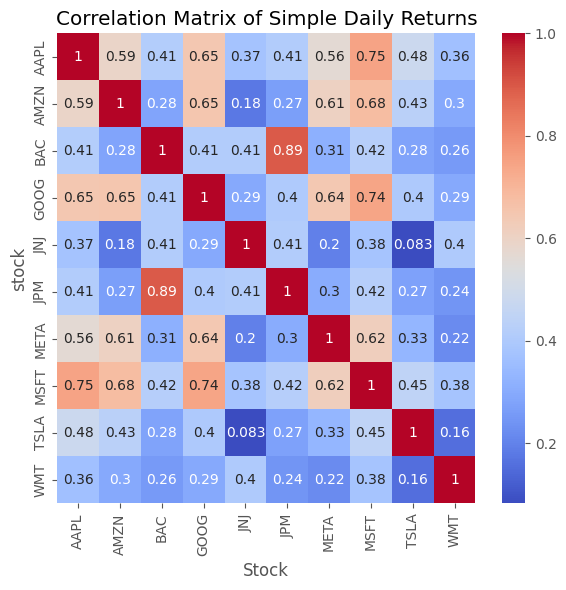

In [44]:
import seaborn as sns

returns = df_pivot.pct_change()
returns.dropna(inplace=True)
returns

plt.figure(figsize=(6, 6))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Simple Daily Returns')
plt.xlabel("Stock")
plt.ylabel("stock")
plt.tight_layout()
plt.show()

Create a vector `equal_weights` containing 10 elements, each with a value of 0.1, indicating that **each stock has equal weight in the portfolio.** 

Calculate the **daily returns** of the portfolio by matrix dot product, where `p_returns` is a matrix containing the daily returns of each stock. 

Calculate the **cumulative returns** of the portfolio by converting the daily returns to cumulative product form and subtracting 1 to get the final cumulative returns, which is `p_cumureturns`. 

Calculate the **annualised returns** of the portfolio (`annualised_returns`) by taking the average of the daily returns and multiplying by the number of trading days in a year (TRADING_DAYS), which is assumed to be 252 days. The annualised returns of this equal weights portfolio is around 0.269.


In [45]:
equal_weights = np.ones(10)/10
equal_weights

p_returns = np.dot(returns, equal_weights)
p_returns
print(f"The returns of this equal weights portfolio is {p_returns}")

p_cumureturns = (1 + p_returns).cumprod() - 1
p_cumureturns
print(f"The cumulative returns of this equal weights portfolio is {p_cumureturns}")

annualised_returns = p_returns.mean() * TRADING_DAYS
print(f"The annualised returns of this equal weights portfolio is {annualised_returns}")


The returns of this equal weights portfolio is [-0.00692435  0.00826727  0.00018525 ... -0.00289901 -0.01445845
 -0.01327594]
The cumulative returns of this equal weights portfolio is [-6.92434534e-03  1.28567791e-03  1.47116353e-03 ...  2.37696687e+00
  2.32814115e+00  2.28395695e+00]
The annualised returns of this equal weights portfolio is 0.268729919609868


Calculate the **daily standard deviation** (`daily_volatility`)of portfolio returns as a risk measurement.

Calculates the **annualized volatility** of a portfolio. `annualized_volatility` is calculated by multiplying the daily volatility by the square root of the number of trading days (`TRADING_DAYS`) and is often used to measure the long-term risk of a portfolio.

In [46]:
daily_volatility  = p_returns.std()
print(f"The daily volatility of this portfolio is {daily_volatility}")

annualised_volatility = p_returns.std() * np.sqrt (TRADING_DAYS)
print(f"The annualised volatility of this portfolio is {annualised_volatility}")

The daily volatility of this portfolio is 0.015413573734127524
The annualised volatility of this portfolio is 0.2446828974915518


Plot a cumulative returns curve for the portfolio to visually demonstrate the performance of the portfolio over a period of time.

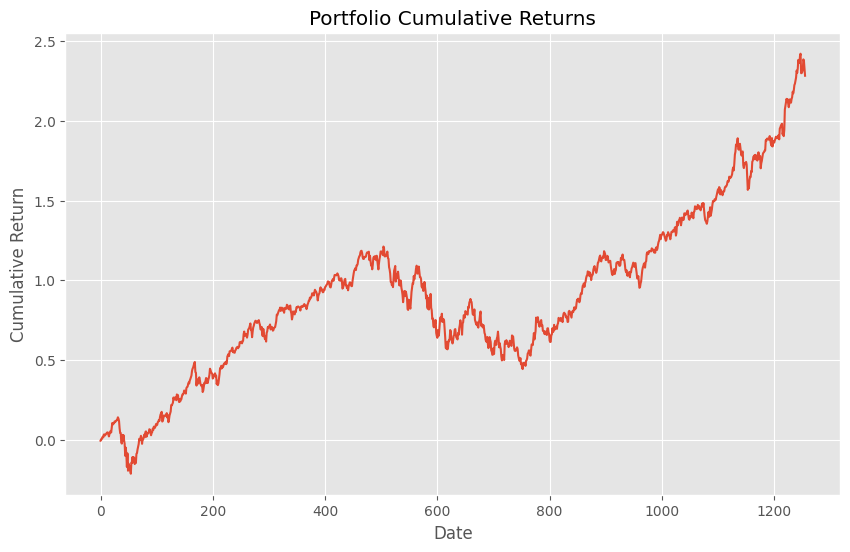

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(p_cumureturns)
plt.title('Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()

## **Portfolio Optimisation**

Calculate and output the sharpe ratio of this equal_weights portfolio, which is 0.919.

In [48]:
Sharpe_Ratio = (annualised_returns - RFR) / annualised_volatility

print(f"Sharpe ratio is {Sharpe_Ratio} ")

Sharpe ratio is 0.9192711134117338 


**Optimize portfolio weights by maximizing the Sharpe ratio.**

Since there is no maximize function in the existing package, **minimize negative sharpe ratio is used to achieve the function of maximizing sharpe ratio.**

First, the `negative_sharpe` function is defined to calculate the negative Sharpe ratio under a given weight, then constraints are set to ensure that the sum of weights is 1, and the upper and lower bounds of the weights are set for each stock (0 to 1). Then the `minimize` function is used to optimize `negative_sharpe`, and the initial weights are set to equal weights. After the optimization is completed, the optimal weights are converted to percentage form and the optimal weights of each stock are output. In short, this code uses an optimization algorithm to find a weight allocation scheme that maximizes the portfolio Sharpe ratio.

In [49]:
def negative_sharpe (weights):
    p_returns = np.dot(returns, weights)
    annualised_returns = p_returns.mean() * TRADING_DAYS
    annualised_volatility = p_returns.std() * np.sqrt (TRADING_DAYS)
    sharpe = (annualised_returns - RFR) / annualised_volatility
    return -sharpe


cons = {"type": "eq","fun": lambda x: sum(x) - 1 }

bounds = tuple((0, 1) for x in range (10))

int_weights = np.ones(10)/10

optimal = minimize(negative_sharpe, int_weights, bounds = bounds, constraints= cons)
opt_weights = optimal.x
opt_weights_percentage = opt_weights * 100

tickers = ["AAPL","MSFT","GOOG","AMZN","META","TSLA","JPM","BAC","JNJ","WMT"]

print("Optimal Weights (%):")
for i, weight in enumerate(opt_weights_percentage):
    print(f"{tickers [i]}: {weight:.4f}%")

Optimal Weights (%):
AAPL: 9.0633%
MSFT: 0.0000%
GOOG: 0.0000%
AMZN: 1.2283%
META: 0.0000%
TSLA: 0.0000%
JPM: 5.6945%
BAC: 0.0000%
JNJ: 31.1307%
WMT: 52.8832%


The results show that instead of equal weights on each stocks, the portfolio will have a better sharpe ratio thus a greater returns with following allocation weights: AAPL - 9.0633%; AMZN - 1.2283%; JPM - 5.6945%; JNJ - 31.1307%; WMT - 52.8832% and all the rest 0.

**Calculate the sharpe ratio of the optimised portfolio, which is 1.2213 ans is better than the equal weights portfolio's sharpe ratio (0.9193).**

In [50]:
def calculate_sharpe_ratio(weights):
    p_returns = np.dot(returns, weights)
    annualised_returns = p_returns.mean() * TRADING_DAYS
    annualised_volatility = p_returns.std() * np.sqrt(TRADING_DAYS)
    sharpe_ratio = (annualised_returns - RFR) / annualised_volatility
    return sharpe_ratio

optimal_sharpe_ratio = calculate_sharpe_ratio(opt_weights)

print(f"\nOptimal Portfolio Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

optimal_annualised_returns = np.dot(returns, opt_weights).mean() * TRADING_DAYS

print(f"\nOptimal Portfolio Annualised Returns: {optimal_annualised_returns:.4f}")


Optimal Portfolio Sharpe Ratio: 1.2213

Optimal Portfolio Annualised Returns: 0.3945


## **Implement an AI-generated portfolio optimisation**

**Generate a List of Strategies:** Consult a generative AI model to provide a listof potential portfolio optimisation strategies that focus on maximising orminimising a specific metric. Focus only on those strategies that leverage SciPy's minimize function.
Give this instruction to AI and it generate the following list：

**List of potential portfolio optimisation strategies using SciPy minimize function:**

1. Minimise Portfolio Volatility (Risk)
 - Objective: Minimise the annualised standard deviation of portfolio returns.
 - Useful for risk-averse investors.

2. Maximise Minimum Asset Weight (Diversification)
 - Objective: Maximise the minimum weight among all assets to avoid concentration.
 - Promotes diversification by ensuring no asset has a negligible allocation.

3. Maximise Expected Return (with Risk Constraint)
 - Objective: Maximise annualised portfolio return.
 - Add a constraint that annualised volatility does not exceed a specified threshold.

4. Minimise Value at Risk (VaR)
 - Objective: Minimise the portfolio Value at Risk at a given confidence level.
 - Focuses on limiting potential losses.

5. Maximise Sortino Ratio
 - Objective: Maximise (annualised return - risk-free rate) / downside deviation.
 - Penalises only downside risk, not total volatility.

6. Minimise Portfolio Skewness or Kurtosis
 - Objective: Minimise negative skewness or excess kurtosis of portfolio returns.
 - Targets portfolios with more "normal" return distributions.

All strategies use constraints:
 - Weights sum to 1
 - No short selling (weights between 0 and 1)

**Choose a Strategy and Generate Code:** Select a strategy from those provided and work with the model to generate the code for the objective function, constraints, and bounds necessary for the optimisation. Use the Sharpe Ratio portfolio optimisation code as a reference point for constructing your solution.

**Integrate and Test Code:** Fit the generated code into your Notebook. Ensure syntax style, variable naming, and the overall look & feel match your owncode. Check that it runs correctly to calculate a set of weights for the assets in your portfolio.
- Libraries: Use only NumPy , Pandas and SciPy . Do not introduce new packages for this task.
 - Documentation: You must generously (more than usual) comment the generated code to explain why the code works to optimise the portfolio.

In [51]:
# AI-Generated Portfolio Optimisation: Minimise Portfolio Volatility (Risk)
# This approach finds the set of portfolio weights that minimise the annualised volatility,
# subject to the weights summing to 1 and each weight being between 0 and 1.


def portfolio_volatility(weights):
    # Calculate daily portfolio returns
    port_returns = np.dot(returns, weights)
    # Calculate annualised volatility (risk)
    ann_volatility = port_returns.std() * np.sqrt(TRADING_DAYS)
    return ann_volatility

# Constraints: weights sum to 1
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

# Bounds: each weight between 0 and 1 (no short selling)
bounds = tuple((0, 1) for _ in range(len(tickers)))

# Initial guess: equal weighting
init_guess = np.ones(len(tickers)) / len(tickers)

# Run the optimisation using SciPy's minimize
result_min_vol = minimize(portfolio_volatility, init_guess, bounds=bounds, constraints=constraints)

# Extract optimal weights
min_vol_weights = result_min_vol.x

# Calculate portfolio returns and cumulative returns for the minimum volatility portfolio
min_vol_port_returns = np.dot(returns, min_vol_weights)
min_vol_cum_returns = (1 + min_vol_port_returns).cumprod() - 1

# Calculate annualised volatility and returns for reporting
min_vol_annualised_vol = min_vol_port_returns.std() * np.sqrt(TRADING_DAYS)
min_vol_annualised_ret = min_vol_port_returns.mean() * TRADING_DAYS

print("AI-Generated (Min Volatility) Portfolio Weights (%):")
for i, w in enumerate(min_vol_weights * 100):
    print(f"{tickers[i]}: {w:.4f}%")
print(f"\nAnnualised Return: {min_vol_annualised_ret:.4f}")
print(f"Annualised Volatility: {min_vol_annualised_vol:.4f}")

AI-Generated (Min Volatility) Portfolio Weights (%):
AAPL: 0.0000%
MSFT: 7.5872%
GOOG: 0.0000%
AMZN: 4.0423%
META: 52.2313%
TSLA: 4.9622%
JPM: 0.0000%
BAC: 0.0000%
JNJ: 0.3001%
WMT: 30.8770%

Annualised Return: 0.1264
Annualised Volatility: 0.1696


In [52]:
# AI-Generated Portfolio Optimisation: Maximise Expected Return with Risk Constraint
# This approach finds the set of portfolio weights that maximise annualised return,
# subject to the weights summing to 1, each weight between 0 and 1, and annualised volatility <= threshold.

# Set a risk threshold (e.g., equal-weighted portfolio volatility or a value you choose)
risk_threshold = annualised_volatility  # You can adjust this value as needed

def negative_annualised_return(weights):
    # Negative because we want to maximise return (minimize negative return)
    port_returns = np.dot(returns, weights)
    ann_return = port_returns.mean() * TRADING_DAYS
    return -ann_return

def risk_constraint(weights):
    # Constraint: annualised volatility must be <= risk_threshold
    port_returns = np.dot(returns, weights)
    ann_vol = port_returns.std() * np.sqrt(TRADING_DAYS)
    return risk_threshold - ann_vol  # Must be >= 0

# Constraints: weights sum to 1, and risk constraint
constraints_max_ret = [
    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
    {'type': 'ineq', 'fun': risk_constraint}
]

# Bounds: each weight between 0 and 1 (no short selling)
bounds_max_ret = tuple((0, 1) for _ in range(len(tickers)))

# Initial guess: equal weighting
init_guess_max_ret = np.ones(len(tickers)) / len(tickers)

# Run the optimisation using SciPy's minimize
result_max_ret = minimize(
    negative_annualised_return,
    init_guess_max_ret,
    bounds=bounds_max_ret,
    constraints=constraints_max_ret
)

# Extract optimal weights
max_ret_weights = result_max_ret.x

# Calculate portfolio returns and cumulative returns for the max return portfolio
max_ret_port_returns = np.dot(returns, max_ret_weights)
max_ret_cum_returns = (1 + max_ret_port_returns).cumprod() - 1

# Calculate annualised volatility and returns for reporting
max_ret_annualised_vol = max_ret_port_returns.std() * np.sqrt(TRADING_DAYS)
max_ret_annualised_ret = max_ret_port_returns.mean() * TRADING_DAYS

print("AI-Generated (Max Return, Risk-Constrained) Portfolio Weights (%):")
for i, w in enumerate(max_ret_weights * 100):
    print(f"{tickers[i]}: {w:.4f}%")
print(f"\nAnnualised Return: {max_ret_annualised_ret:.4f}")
print(f"Annualised Volatility: {max_ret_annualised_vol:.4f}")

AI-Generated (Max Return, Risk-Constrained) Portfolio Weights (%):
AAPL: 8.8179%
MSFT: 0.0000%
GOOG: 0.0000%
AMZN: 5.2613%
META: 0.0000%
TSLA: 5.1658%
JPM: 3.8962%
BAC: 0.0000%
JNJ: 21.0212%
WMT: 55.8376%

Annualised Return: 0.3375
Annualised Volatility: 0.2447


Visually (by plotting) compare the:

Cumulative Sharpe Ratio optimised portfolio returns

Cumulative portfolio returns optimised using the AI-generated approach

Cumulative initial (equal-weighting) portfolio returns.



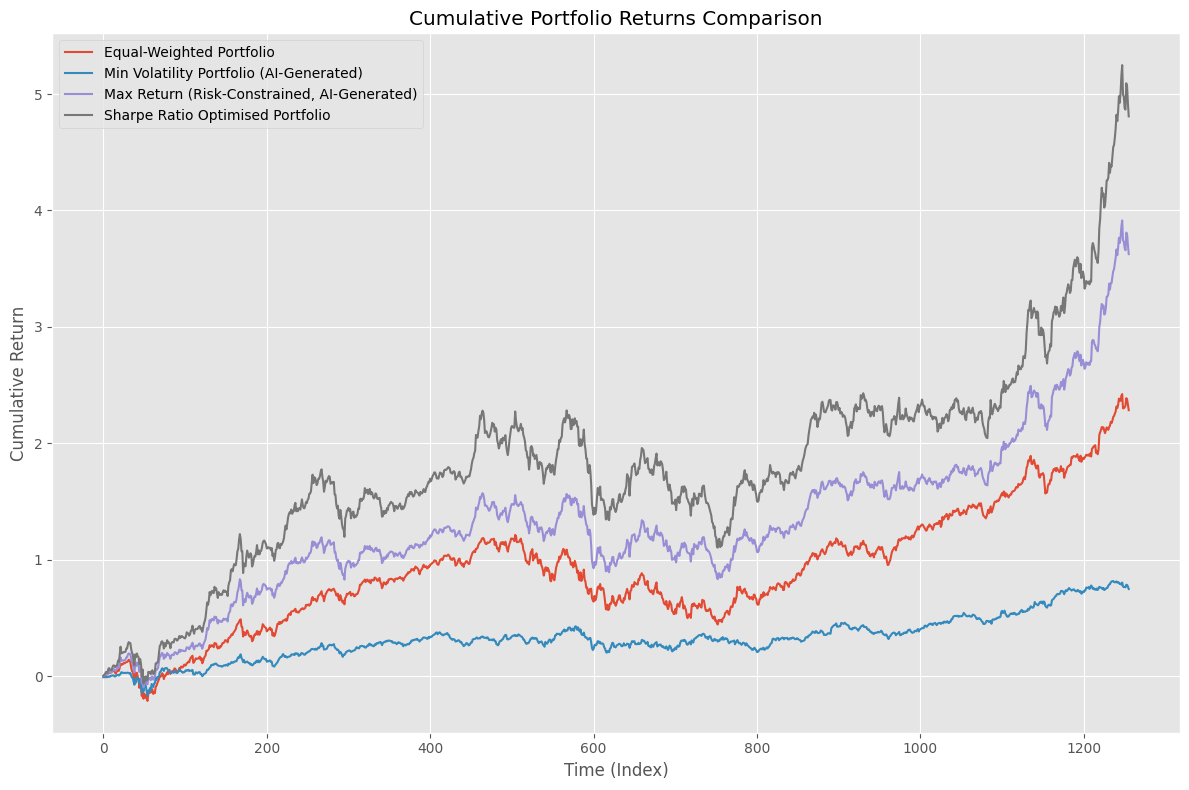

In [55]:
plt.figure(figsize=(12, 8))
plt.plot(p_cumureturns, label='Equal-Weighted Portfolio')
plt.plot(min_vol_cum_returns, label='Min Volatility Portfolio (AI-Generated)')
plt.plot(max_ret_cum_returns, label='Max Return (Risk-Constrained, AI-Generated)')

# Calculate cumulative returns for Sharpe Ratio optimised portfolio
optimal_port_returns = np.dot(returns, opt_weights)
optimal_cum_returns = (1 + optimal_port_returns).cumprod() - 1
plt.plot(optimal_cum_returns, label='Sharpe Ratio Optimised Portfolio')

plt.title('Cumulative Portfolio Returns Comparison')
plt.xlabel('Time (Index)')
plt.ylabel('Cumulative Return')
plt.legend()
plt.tight_layout()
plt.show()

## **Reporting**
Based on your strategy backtest results and portfolio optimisation, write a 2-4 paragraph report at the end of the Notebook. Your report should cover:
- The portfolio optimisation you recommend
- The proposed optimal weights for each stock, displayed as a table
- The stocks, if any, you advise trading based on the mean reversion strategy
- A commentary on the clarity and ease of integration of the code generated by the AI tools.
- An overall recommendation for investment - should the firm consider this portfolio?



Your Notebook must be converted to a `.html` file before submission. Open the Terminal at the bottom of the Codespace and type the following: jupyter nbconvert --to html Assessment2.ipynb